<a href="https://colab.research.google.com/github/DanielVelaJ/ML_experiments/blob/main/Tic_tac_toe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook
from sklearn.tree import DecisionTreeRegressor
import random
from sklearn.tree import plot_tree

# The Board Class

In [ ]:

class Board:
    '''This class instantiates a tic tac toe board
    
    
    The board is a 9x9 board for tic tac toe with two players. The players plays
    are saved in p1 and p2, attribute winner keeps track of weather a winning
    combination has been achieved. The method objective_function measures the 
    score of both players at any given time. 


    Attributes:
        p1 (frozenset): a set containing the plays played by player 1. 
        p2 (frozenset): a set containing the plays played by player 2. 
        size(int): the size of the board
        solutions(set of frozensets): a set containing all the forzensets that
            describe straight lines in the board (winning combinations). Ex: 
            {1,2,3} makes an horizontal line. 
        turn(int): either 1 or 2 indicates the player whose turn is. 
        player1_symbol: the symbol that will represent player1's plays in the 
            board.
        player2_symbol: the symbol that will represent player 2's plays in the 
            board.
        
    '''
    def __init__(self,p1=frozenset(),p2=frozenset(),turn=1,n=9):
        '''Initializes a board object
        
            Arguments:
                p1(frozenset): a frozenset containing the slots that have been
                    occupied by player 1. Default value is empty frozenset.
                p2(frozenset): a forzenset containing the slots that have been 
                    occupied by player 2. Default value is empty frozenset. 
                turn(int): the number of player in turn. 
                n(int): the size of the board nxn. Default vaule is 9. 
                    NOT WORKING YET!!
                
                *Note: Frozensets must be used for p1 and p2, otherwise mutability
                of normal sets causes problems.
        '''        
        self.p1=p1  
        self.p2=p2 
        self.size=n
        self.solutions={frozenset({1,2,3}),
                         frozenset({4,5,6}),
                         frozenset({7,8,9}),
                         frozenset({1,4,7}),
                         frozenset({2,5,8}),
                         frozenset({3,6,9}),
                         frozenset({1,5,9}),
                         frozenset({3,5,7})}
        self.turn=turn
        self.player1_symbol='O'
        self.player2_symbol='X'



# Decorated properties
    @property   
    def occupied_slots(self):
        '''set: a set that contains the slots in the board that have been 
        occupied'''
        return self.p1.union(self.p2)

    @property
    def empty_slots(self):
        '''set: returns a set that contains the slots in the board that can 
        still be played'''
        return set(np.arange(9)+1)-self.occupied_slots
    
    @property    
    def state(self):
        '''list: [frozenset(), frozenset(), int]: a list that resumes the 
        current state of the board the first element are player 1 plays, 
        the second element are player 2 plays and the third element is the 
        turn '''
        return [self.p1,self.p2,self.turn]
        
    @property
    def winner(self):
        '''int: 1 if player 1 has won. 2 if player two has won. 3 if it is a tie
        0 if no one has won yet or not tie has been reached. 
        '''
        winner=0
        for solution in self.solutions:
            if solution.issubset(self.p1): 
                winner=1
                return winner
            elif solution.issubset(self.p2): 
                winner=2
                return winner
            elif len(self.empty_slots)==0: 
                winner=3
        return winner    
    
    @property
    def has_ended(self):
        '''bool: False if the game is still playable. True if someone has won 
        or all slots have been used. 
        '''
        end=self.winner!=0 or self.empty_slots==set()
        return end

        


    def objective_function(self,player_no):
        '''int: estimates the strength of the position for a given player
        
        Arguments:
            player_no (int): the number of the player whose score will be 
                estimated. 
        Returns: 
            score(int): An int that represents the strenght of a given position on 
                the board for player specified by player_no. 

        '''
        score=0
        if player_no==1:
            # print('player no 1')
            plays_in_favor= self.p1
            plays_against= self.p2
        elif player_no==2:
            # print('player no 2')
            plays_in_favor= self.p2
            plays_against=self.p1

        # Calculate remaining possible solutions for player:
        live_solutions=set()
        for solution in self.solutions:
            if len(solution.intersection(plays_against))==0:
                live_solutions.add(solution)



        # For each possible solution, add the length of its intersection with 
        # the plays of the player in favor to the total socre. 
        for solution in live_solutions:

            score+= len(plays_in_favor.intersection(solution))
            score-= len(plays_against.intersection(solution))
        return score

    def win_fraction(self):
        '''This method checks for the proportion of won games if the games are 
        played in every way possible starting from the current position of the
        board.
        
        Arguments:
            
            player(int): Takes values 1 or 2 and represents the player whose
                win fraction is to be evaluated. 
        
        Output:
            fraction(float): The fraction of won endings over total number
                of endings that are possible starting from the current position
                of the board
        
         '''

        p1_wins=0
        p2_wins=0
        ties=0
        endings=self.endings()
        for ending in endings :
            # print('For this ending')
            # ending.print()
            if ending.winner==1:
                p1_wins+=1
                # print('p1 win')
                # print(f'p1 counter at: {p1_wins}')
            if ending.winner==2:
                p2_wins+=1
                # print('p2 win')
                # print(f'p2 counter at: {p2_wins}')
            elif(ending.winner==3):
                # print('tie')
                # print(f'tie counter at: {ties}')
                ties+=1
                #ending.print()

        p1_win_frac= p1_wins/len(endings)
        p2_win_frac= p2_wins/len(endings)
        tie_frac= ties/len(endings)
        
        #print(f"p1 win fraction: {p1_wins/len(endings)}")
        #print(f"p2 win fraction: {p2_wins/len(endings)}")
        #print(f"tie fraction: {ties/len(endings)}")
            
        return p1_win_frac,p2_win_frac,tie_frac       

    def print(self):
        '''Prints the board, the scores for each player and the player whose
        turn is.'''
        n=9
        board_skeleton="{}|{}|{}\n"\
                        "-----------\n"\
                        "{}|{}|{}\n"\
                        "-----------\n"\
                        "{}|{}|{}\n"
        board_content=[" "]*n
        for slot in np.arange(n+1):
            if slot in self.p1:
                board_content[slot-1]= ' '+self.player1_symbol+' '
            elif slot in self.p2:
                board_content[slot-1]= ' '+ self.player2_symbol+' '
            else:
                board_content[slot-1]='   '
        print(board_skeleton.format(*board_content))
        print('Score for {}: {}'.format(self.player1_symbol,self.objective_function(1)))
        print('Score for {}: {}'.format(self.player2_symbol,self.objective_function(2)))

        symbol=self.player1_symbol if self.turn==1 else self.player2_symbol
        print('Player{}\'s turn. ({})'.format(self.turn,symbol))
        

    def play(self,slot,player_no=None, print=False):
        '''Makes a play in the board.
        
        This method adds a play to the player in turn. If the player_no is 
        specified, then the play counts as a play for that polayer. If 
        print=True then the board is printed after the play is made.
        
        Arguments:
            player_no(int): The player that will be forced to make the play. 
            print (bool): if True the board is printed after the play is made.
        '''
        
        # in case player_no is specified:
        if slot not in [1,2,3,4,5,6,7,8,9]:
            print('not a valid move, try again')
            return
        
        if player_no==1:
            self.turn=1
        elif player_no==2:
            self.turn=2
        
        if self.turn==1:
            self.turn=2
            self.p1=self.p1.union([slot])
        elif self.turn==2:
            self.turn=1
            self.p2=self.p2.union([slot])
        if print: self.print()

    def remove(self,slot):
        '''Removes a play from the board
        
        Arguments: 
            slot(int): an int with the slotnumber to be removed. '''
        slot=frozenset(slot)
        self.p1=self.p1-slot
        self.p2=self.p2-slot
    
    def endings(self):
        '''Returns a list with all endings that are possible from the board's
            position
            Notes: Requires the function recursive_children().

            Arguments: None
            Output: 
                endings(list of Board): returns a list of boards with the board
                    endings that are possible from this position. '''

        all_children=recursive_children([self],[])
        endings=[]
        for level in all_children:
            for board in level:
                if board.has_ended:
                    endings.append(board)
        return endings




    


## transform_to_row

In [ ]:
def transform_to_row(board):
    '''Takes a Board object and transforms it into a list of 9 columns.
    
    The columns correspond each to a different slot in the board. A 1 in the
    column indicates player one has played that slot, a 2 in the column
    means player 2 has made a play in that slot. If the slot is empty it is 
    represented with a zero

    Argunemts:
        board (Board object): a board object to be represented in list format. 
    Returns:
        board_row(list): a list with the row representation of the board. 



    '''

    row=[0]*9
    for i in np.arange(9):
        if i+1 in board.p1: row[i]=1
        if i+1 in board.p2: row[i]=2
    return row

### transform_to_row example


In [ ]:
#Establishing a position on the board:
board=Board()
board.play(5)# make some plays
board.play(1)
board.play(3)
board.play(7)
board.print()
print(transform_to_row(board))

 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)
[2, 0, 1, 0, 1, 0, 2, 0, 0]


## transform to volume 
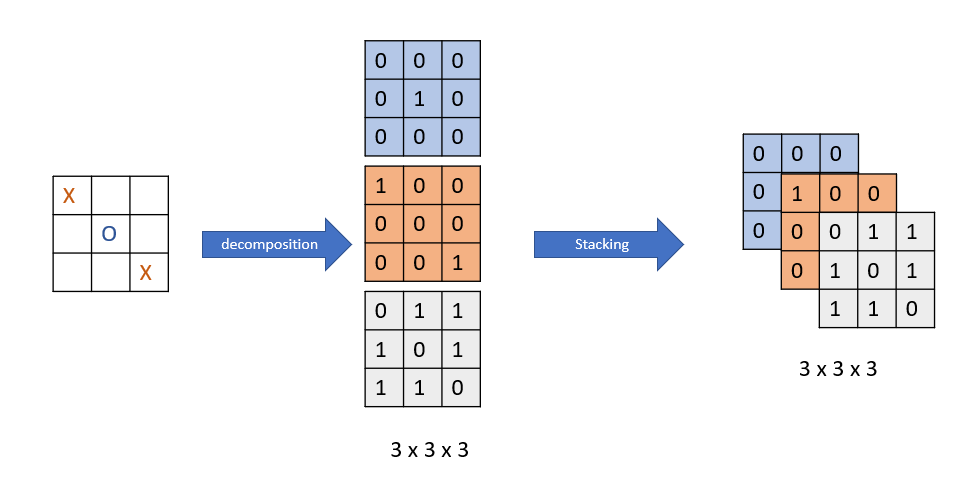

In [ ]:
def transform_to_volume(board):
    b=transform_to_row(board)
    b_array=np.array(b)
    b_array=b_array.reshape((3,3))

    p1 = b_array==1
    p2 = b_array==2
    e = b_array==0 

    volume=np.zeros((3,3,3))
    volume[:,:,0]=p1
    volume[:,:,1]=p2
    volume[:,:,2]=e
    return volume


#### Transform to volume example

## immediate_children

In [ ]:
def immediate_children(boards):
    ''' Generates a list for all boards in the given list [boards] of the 
    positions that are one play away from the current position. 

    Arguments:
        boards(list of Board): a list of Boards. 
    Returns:
        children(list of Board): a list of all the boards that are one play away from the given
            position of the boards in the [boards] list
    
    '''

    children=[]
    children_states=[]
    c=0
    #print('STARTING METHOD------------------------------------------')
    for board in boards:
        c+=1
        if board.winner==0:
        # If the board has no winner yet
            #print('FOR THE FOLLOWING BOARD AT INDEX {} TO CONSIDER: \n'.format(c))
            #print('These are the valid plays:\n')
            #board.print()
            for slot in board.empty_slots:
            # For every empty slot
                child_board=copy.deepcopy(board)
                
                #print(f'playing at slot {slot}')
                child_board.play(slot)

                child_board_state=child_board.state


                if child_board_state not in children_states:
                # Make sure not to add the same board twice in this generation

                    children.append(child_board)
                    children_states.append(child_board.state)
    #print('\n\n\n')

    return children


## recursive_children

In [ ]:
def recursive_children(b,all=[]):
    '''Generates a list of lists of boards with all possible scenarios stemming
    from a given board position. The search stops whenever the board reaches a
    winning position for any player.
    
    
    Arguments:
        b(Board): a Board object with the starting position for all children
            boards in the tree. 
        all(list): an empty list on which to append the resulting boards.
    Output:
        all(list of lists): a list containing lists that represent each level 
            of the tree branching from the given board [board].
    
    '''
    all.append(b)
    
    children=immediate_children(b)
    
    if len(children)==0:
        #print('printing list final if case')
        return all
    else:

        recursive_children(children,all)

    return all


### recursive_children testing


In [ ]:
board=Board()

#Setup a winning board for player 1
board.play(5,print=True)
board.play(1,print=True)
board.play(3,print=True)
board.play(4,print=True)
#board.play(7,print=True

rc=recursive_children([board],[])

   |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 4
Score for X: 0
Player2's turn. (X)
 X |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 3
Score for X: 2
Player1's turn. (O)
 X |   | O 
-----------
   | O |   
-----------
   |   |   

Score for O: 5
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
 X | O |   
-----------
   |   |   

Score for O: 4
Score for X: 2
Player1's turn. (O)


In [ ]:
for i in rc:
    for j in i:
        j.print()

 X |   | O 
-----------
 X | O |   
-----------
   |   |   

Score for O: 4
Score for X: 2
Player1's turn. (O)
 X | O | O 
-----------
 X | O |   
-----------
   |   |   

Score for O: 5
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
 X | O | O 
-----------
   |   |   

Score for O: 5
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
 X | O |   
-----------
 O |   |   

Score for O: 6
Score for X: 0
Player2's turn. (X)
 X |   | O 
-----------
 X | O |   
-----------
   | O |   

Score for O: 6
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
 X | O |   
-----------
   |   | O 

Score for O: 6
Score for X: 2
Player2's turn. (X)
 X | O | O 
-----------
 X | O |   
-----------
   | X |   

Score for O: 3
Score for X: 3
Player1's turn. (O)
 X | O | O 
-----------
 X | O |   
-----------
   |   | X 

Score for O: 4
Score for X: 3
Player1's turn. (O)
 X | O | O 
-----------
 X | O | X 
-----------
   |   |   

Score for O: 4
Score for X: 2
Player1's turn. (O)
 

## win_fraction

In [ ]:
    def win_fraction(board,player=1):
        '''This method checks for the proportion of won games if the games are 
        played in every way possible starting from the current position of the
        board.
        
        Arguments:
            board(Board instance): A board on which to evaluate the metric. 
            
            player(int): Takes values 1 or 2 and represents the player whose
                win fraction is to be evaluated. 
        
        Output:
            fraction(float): The fraction of won endings over total number
                of endings that are possible starting from the current position
                of the board
        
         '''

        #First we get all the ending scenarios from a given tree.  
        endings=board.endings()

        # We calculate the proportion of won games. 
            
        wins=len([b for b in endings if b.winner==player])
            
        fraction=float(wins)/float(len(endings))
            
        return fraction 

### win_fraction testing

In [ ]:
board=Board()

#Setup a winning board for player 1
board.play(5,print=True)
board.play(6,print=True)
board.play(3,print=True)


print(f'win fraction: {win_fraction(board)}')



   |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 4
Score for X: 0
Player2's turn. (X)
   |   |   
-----------
   | O | X 
-----------
   |   |   

Score for O: 3
Score for X: 1
Player1's turn. (O)
   |   | O 
-----------
   | O | X 
-----------
   |   |   

Score for O: 5
Score for X: 0
Player2's turn. (X)
win fraction: 0.9027777777777778


### win_fraction method use example

In [ ]:
board=Board()
board.play(5,print=False)# make some plays
board.play(1,print=False)
board.play(3,print=False)

print('Starting board:')
board.play(7,print=True)


print('----------------------------------\n\nPossible endings:')
all=[]
endings=board.endings()

player_wins=0
player_losses=0
player_ties=0
for b in endings:
    b.print()
    
    if b.winner==1:
        player_wins+=1
    elif b.winner==2:
        player_losses+=1
    else:
        player_ties+=1

print(f'for player 1 (O):  \n\nwins:{player_wins} losses: {player_losses} ties: {player_ties}')
win_f=win_fraction(board);
print(f'win proportion is {win_f}')

Starting board:
 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)
----------------------------------

Possible endings:
 X | O | O 
-----------
 X | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 4
Player1's turn. (O)
 X |   | O 
-----------
 X | O | O 
-----------
 X |   |   

Score for O: 3
Score for X: 4
Player1's turn. (O)
 X |   | O 
-----------
 X | O |   
-----------
 X | O |   

Score for O: 3
Score for X: 3
Player1's turn. (O)
 X |   | O 
-----------
 X | O |   
-----------
 X |   | O 

Score for O: 3
Score for X: 3
Player1's turn. (O)
 X | O | O 
-----------
   | O |   
-----------
 X | O | X 

Score for O: 4
Score for X: 2
Player2's turn. (X)
 X | O | O 
-----------
   | O | X 
-----------
 X | O |   

Score for O: 3
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
 O | O | O 
-----------
 X | X |   

Score for O: 5
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
 O | O | O 
------

##best_plays

In [ ]:
def best_plays(board, metric, print=False):
    '''Returns a vector with plays for the player in turn ordered by 
        a given metric.
        
        Arguments:
            board(Board object): The board to evaluate. 
            
            metric(func): A function that takes a board and returns the
             strength of that particular board's position as a float. 
                     
        Output:
            plays(list of int): a list of plays ordered from strongest to 
                weakest. The plays are given by ints in the list that represent
                the slot to be played. (from 1 to 9 in a 9x9 tic tac toe matrix
                
                
    '''

    #Get all the possible next move boards
    next_moves= np.array(list(board.empty_slots))
    #For each move, evaluate strength:
    strength=np.zeros(len(next_moves))
    for i,move in enumerate(next_moves):
        test_board=copy.deepcopy(board)
        test_board.play(move,print=False)
        strength[i]=metric(test_board,1)

        if print:
            print(f'performing evaluation for move {move}\n')
            test_board.print()
            print(f'strength:{metric(test_board,1)}')
    return next_moves, strength
        

        

### best_plays testing


In [ ]:
np.argsort(strength)

array([0, 1, 3, 4, 2])

array([7, 9, 8, 6, 2])

In [ ]:
#Setup a board which is 1 move away from winning
board=Board()
board.play(5,print=True)
board.play(1,print=True)
board.play(3,print=True)
board.play(4,print=True)

#now evaluate the next move stregth
moves, strength=best_plays(board,win_fraction)
print('\n\nFor the current board we have the best plays are: ')
board.print()



print(strength[np.argsort(strength)][::-1])
print(moves[np.argsort(strength)][::-1])

   |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 4
Score for X: 0
Player2's turn. (X)
 X |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 3
Score for X: 2
Player1's turn. (O)
 X |   | O 
-----------
   | O |   
-----------
   |   |   

Score for O: 5
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
 X | O |   
-----------
   |   |   

Score for O: 4
Score for X: 2
Player1's turn. (O)


For the current board we have the best plays are: 
 X |   | O 
-----------
 X | O |   
-----------
   |   |   

Score for O: 4
Score for X: 2
Player1's turn. (O)
[1.         0.58333333 0.58333333 0.58333333 0.58333333]
[7 9 8 6 2]


## Print descendence

In [ ]:
def print_descendence(descendence):
    for level in range(len(descendence))[0:]:
        print('\n\n')
        print(f'At level {level} we get:\n')
        for b in descendence[level]:
            b.print()

# Show Class functionality


## 1. Make a board and play a game, then check who is the winner


In [ ]:
board=Board()
board.play(5,print=True)# make some plays
board.play(1,print=True)
board.play(3,print=True)
board.play(7,print=True)

print('\n\n\n')
print(f'Empty slots are: {board.empty_slots}') #check for empty slots
print(f'player 1 has played the slots: {board.p1}') #see play set for player 1
print('\n\n\n')

board.play(4,print=True)
board.play(8,print=True)
board.play(6,print=True)
print(f'Winner is {board.winner}!!!')


   |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 4
Score for X: 0
Player2's turn. (X)
 X |   |   
-----------
   | O |   
-----------
   |   |   

Score for O: 3
Score for X: 2
Player1's turn. (O)
 X |   | O 
-----------
   | O |   
-----------
   |   |   

Score for O: 5
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)




Empty slots are: {2, 4, 6, 8, 9}
player 1 has played the slots: frozenset({3, 5})




 X |   | O 
-----------
 O | O |   
-----------
 X |   |   

Score for O: 4
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
 O | O |   
-----------
 X | X |   

Score for O: 3
Score for X: 2
Player1's turn. (O)
 X |   | O 
-----------
 O | O | O 
-----------
 X | X |   

Score for O: 5
Score for X: 2
Player2's turn. (X)
Winner is 1!!!


## 2. Show the children boards for a given board's position


In [ ]:
#Showing current position
board=Board()
board.play(5)# make some plays
board.play(1)
board.play(3)
board.play(7)
board.print()

 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)


In [ ]:
board_children=immediate_children([board])

print('let us print them')
for board in board_children:
    board.print()

let us print them
 X | O | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 4
Score for X: 3
Player2's turn. (X)
 X |   | O 
-----------
 O | O |   
-----------
 X |   |   

Score for O: 4
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
   | O | O 
-----------
 X |   |   

Score for O: 5
Score for X: 3
Player2's turn. (X)
 X |   | O 
-----------
   | O |   
-----------
 X | O |   

Score for O: 4
Score for X: 2
Player2's turn. (X)
 X |   | O 
-----------
   | O |   
-----------
 X |   | O 

Score for O: 4
Score for X: 2
Player2's turn. (X)


## 3. Get all the possible children boards from a given position.

In [ ]:
#Establishing a position on the board:
board=Board()
board.play(5)# make some plays
board.play(1)
board.play(3)
board.play(7)
board.print()

 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)


In [ ]:
a=recursive_children([board],[])

In [ ]:
print('At level 0 we get the original board')
a[0][0].print()
print('\n\nAt level 2 we get:')
print('--------------------------------------------')

a[1][0].print()
a[1][1].print()
a[1][3].print()
print('etc')

print('\n\nAt level 3 we get:')
print('--------------------------------------------')

a[2][0].print()
a[2][1].print()
a[2][3].print()

print('etc')

At level 0 we get the original board
 X |   | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 3
Score for X: 3
Player1's turn. (O)


At level 2 we get:
--------------------------------------------
 X | O | O 
-----------
   | O |   
-----------
 X |   |   

Score for O: 4
Score for X: 3
Player2's turn. (X)
 X |   | O 
-----------
 O | O |   
-----------
 X |   |   

Score for O: 4
Score for X: 1
Player2's turn. (X)
 X |   | O 
-----------
   | O |   
-----------
 X | O |   

Score for O: 4
Score for X: 2
Player2's turn. (X)
etc


At level 3 we get:
--------------------------------------------
 X | O | O 
-----------
   | O |   
-----------
 X | X |   

Score for O: 2
Score for X: 4
Player1's turn. (O)
 X | O | O 
-----------
   | O |   
-----------
 X |   | X 

Score for O: 3
Score for X: 4
Player1's turn. (O)
 X | O | O 
-----------
   | O | X 
-----------
 X |   |   

Score for O: 2
Score for X: 3
Player1's turn. (O)
etc


# Get all the boards  in tic tac toe


In [ ]:
board=Board()

In [ ]:
all_boards=recursive_children([board],[]);

In [ ]:
#flatten the result:
all_boards
def flatten(t):
    return [item for sublist in t for item in sublist]

all_boards=flatten(all_boards)


In [ ]:
p1_boards=[b for b in all_boards if b.turn==1]

### Generate the possible outcomes
It will have two concatenated vectors:;
[m1,m2,m3,m4,m5,p1,p2,p3,p4,p5] where m are moves and p are the evaluation metric or that move. 



In [ ]:
plays=[]
for board in p1_boards:
    moves, strength=best_plays(board,win_fraction)
    result=np.array([moves,strength])
    result=result[:,np.argsort(-result[1, :])]
    move_row=np.pad(result[0],(0,9-len(result[0])),'constant',constant_values=None)
    strength_row=np.pad(result[1],(0,9-len(result[1])),'constant',constant_values=None)
    plays.append(move_row.tolist()+ strength_row.tolist())

KeyboardInterrupt: ignored

Generate rows for all boards and then create dataframe

In [ ]:
p1_boards_rows=list(map(transform_to_row,p1_boards))

NameError: ignored

In [ ]:
final=[]
for i,b in enumerate(p1_boards_rows):
    final.append(b+plays)




In [ ]:
board_rows=np.array(p1_boards_rows)
board_plays=np.array(plays)

In [ ]:
data=np.hstack((board_rows,board_plays))

In [ ]:
columns=['slot_{}'.format(i) for i in np.arange(9)+1]
columns= columns+['best_move_{}'.format(i) for i in np.arange(9)+1]
columns= columns+['prov_best_move_{}'.format(i) for i in np.arange(9)+1]
tic_tac_toe_df=pd.DataFrame(data=data, columns=columns)


In [ ]:
tic_tac_toe_df

In [ ]:
path='/content/drive/MyDrive/Multiple Outcome Trees/Datasets/Tic_tac_toe_datasets/TTTv1.csv'
tic_tac_toe_df.to_csv(path,index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/Multiple Outcome Trees/Datasets/Tic_tac_toe_datasets/TTTv1.csv'
data=pd.read_csv(path)

In [ ]:
data

,slot_1,slot_2,slot_3,slot_4,slot_5,slot_6,slot_7,slot_8,slot_9,best_move_1,...,best_move_9,prov_best_move_1,prov_best_move_2,prov_best_move_3,prov_best_move_4,prov_best_move_5,prov_best_move_6,prov_best_move_7,prov_best_move_8,prov_best_move_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,6.0,0.723451,0.640964,0.640964,0.631325,0.631325,0.535809,0.522546,0.522546,0.522546
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,NaN,0.750000,0.712329,0.670886,0.642857,0.500000,0.433962,0.407407,NaN,NaN
2,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,NaN,0.676471,0.675325,0.620253,0.562500,0.396825,0.365385,0.266667,NaN,NaN
3,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0,...,NaN,0.750000,0.684932,0.658228,0.628571,0.452830,0.452381,0.444444,NaN,NaN
4,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,...,NaN,0.589041,0.575342,0.520000,0.506667,0.323529,0.315789,0.298246,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2734,2.0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2735,2.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2736,0.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2737,0.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Training a tree to play Tick tack toe


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

tree=DecisionTreeClassifier(max_leaf_nodes=5)
X=data.iloc[:,0:9]
y=data.iloc[:,9]

In [ ]:
tree.fit(X,y)
predictions=tree.predict(X)
f1_score(y,predictions, average='weighted')

# EXPERIMENT 1: 


## Make a datafame with win probabilities for each move starting from a given position


In [ ]:
# Instantiate a board with some plays in it. 
# board=Board(p1=frozenset([1,3,9]),p2=frozenset([4,7]),turn=2)
board=Board()
board.print()

   |   |   
-----------
   |   |   
-----------
   |   |   

Score for O: 0
Score for X: 0
Player1's turn. (O)


In [ ]:
# Get the descendence of the board. 
descendence=recursive_children([board])

In [ ]:
# Sanity check on descendence method
print_descendence(descendence)

Streaming output truncated to the last 5000 lines.

Score for O: 2
Score for X: 3
Player2's turn. (X)
 X | X |   
-----------
 O | X |   
-----------
 O | O | O 

Score for O: 4
Score for X: 2
Player2's turn. (X)
 X | X |   
-----------
 O |   | X 
-----------
 O | O | O 

Score for O: 4
Score for X: 2
Player2's turn. (X)
 X |   | X 
-----------
 O | X |   
-----------
 O | O | O 

Score for O: 3
Score for X: 2
Player2's turn. (X)
 X |   | X 
-----------
 O |   | X 
-----------
 O | O | O 

Score for O: 4
Score for X: 2
Player2's turn. (X)
 X |   |   
-----------
 O | X | X 
-----------
 O | O | O 

Score for O: 3
Score for X: 1
Player2's turn. (X)
   | X | X 
-----------
 O | O | O 
-----------
 O | X |   

Score for O: 6
Score for X: 2
Player2's turn. (X)
   | X | X 
-----------
 O | O |   
-----------
 O | X | O 

Score for O: 6
Score for X: 2
Player2's turn. (X)
   | X | X 
-----------
 O | O | X 
-----------
 O | O |   

Score for O: 5
Score for X: 4
Player2's turn. (X)
   | X | X

In [ ]:
# Unstack the descendence from the hierarchical structure
# to leave a flat list of boards. 
descendence_list=[b for c in descendence  for b in c] 

# Take only unfinished boards
descendence_list=[a for a in descendence_list if a.winner==0]

In [ ]:
# Transform the board objects into 3x3x3 objects (see the transform_to_volume section)
vols=[transform_to_volume(b) for b in tqdm_notebook(descendence_list)]
# Index zero of win fraction contains wins, index 1 losses and index 2 ties.
# we use index 0 to get the probability of winning. 
probs=[b.win_fraction()[0] for b in tqdm_notebook(descendence_list)]

  0%|          | 0/9050 [00:00<?, ?it/s]

  0%|          | 0/9050 [00:00<?, ?it/s]

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
0.75
 O |   | O 
-----------
 X | X |   
-----------
 X |   | O 

Score for O: 4
Score for X: 3
Player1's turn. (O)


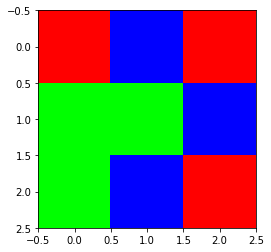

In [ ]:
# Sanity check on volume
i=3
plt.imshow(vols[i])
# Notice that the dimensons are (height, width, channel)
print(vols[i][:,:,2])
print(probs[i])
descendence_list[i].print()

In [ ]:
# Organize in a dataset
dataset=tuple(zip(vols,probs))

## Find all convolutional features for all boards

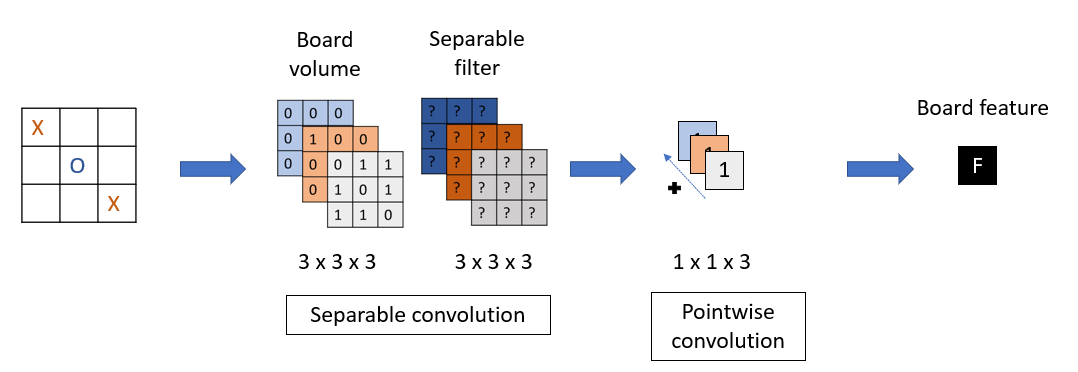

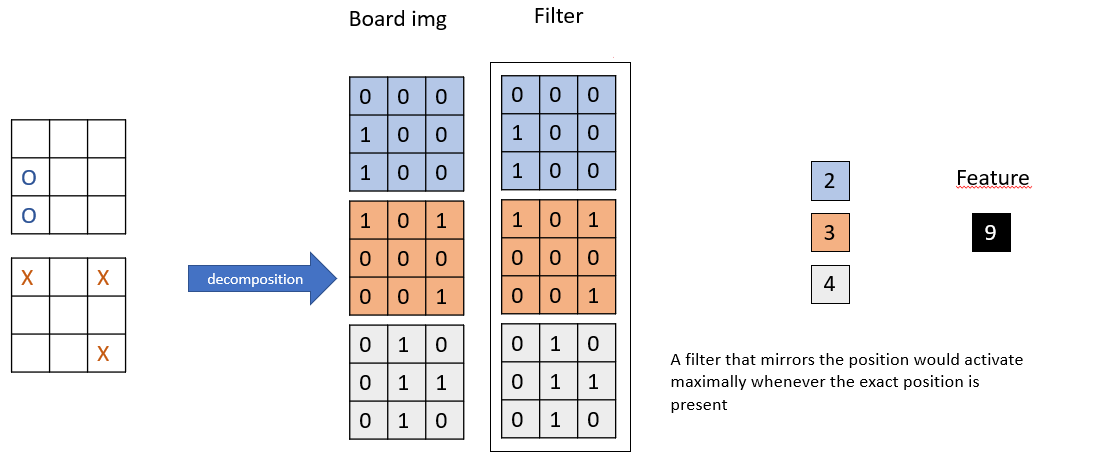

### The convolve operation

In [ ]:
def convolve(board_img,filter,show=False):
    """
    Convolve a board volume with a filter. 

    Each channel in the image is multiplied by its corresponding position in 
    each channel of the filter and then all the results are added together. 

    Args: 
        board_img (3x3x3 array): An array of dimensions (height,width,channels)
            containing zeros and ones. Channel 1 corresponds to player 1, 
            channel two correspnonds to player 2 and channel 3 corresponds 
            to empty slots. 
        filter (3x3x3 array): An array of dimensions (height,width,channels)
            containing zeros and ones. Channel 1 corresponds to player 1, 
            channel two correspnonds to player 2 and channel 3 corresponds 
            to empty slots. Each 
        
    """
    convolution=board_img*filter
    conv_sum=np.sum(convolution,axis=(0,1,2))
    
    if show:
        fig, ax =plt.subplots(1,3)
        ax[0].imshow(board_img)
        ax[0].set_title('board')
        ax[1].imshow(filter)
        ax[1].set_title('filter')
        ax[2].imshow(convolution)
        ax[2].set_title(f'convolution={conv_sum}')
    return conv_sum

Convolve example

7.0

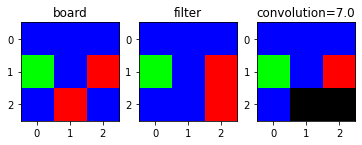

In [ ]:
i=312
board_img=dataset[i][0]
filter=dataset[i+1][0]
convolve(board_img,filter,show=True)


### Calculating convolutions over all the dataset

In [ ]:
features=[]
for board in tqdm_notebook(dataset):
    board_row=[]
    board_img=board[0]
    for filter in (dataset):
        filter=filter[0]
        conv=convolve(board_img,filter,show=False)
        board_row.append(conv)
    features.append(board_row)
feature_dataset=list(tuple(zip(features,probs)))

  0%|          | 0/9050 [00:00<?, ?it/s]

## Train decision tree on the convolutional features to predict probability. 

In [ ]:
# Instantiate model
model=DecisionTreeRegressor()
# Shuffle dataset
random.shuffle(feature_dataset)

In [ ]:
X,y= zip(*feature_dataset)

In [ ]:
model.fit(X,y)

DecisionTreeRegressor()

In [ ]:
feature_importances=model.feature_importances_[np.argsort(model.feature_importances_)[::-1]]
important_filters=np.array(vols)[np.argsort(model.feature_importances_)[::-1]]

In [ ]:
len(feature_importances)

5500

[Text(0.5, 0.875, 'X[4436] <= 2.5\nsquared_error = 0.072\nsamples = 100.0%\nvalue = 0.544'),
 Text(0.25, 0.625, 'X[4256] <= 3.5\nsquared_error = 0.054\nsamples = 41.6%\nvalue = 0.63'),
 Text(0.125, 0.375, 'X[8287] <= 3.5\nsquared_error = 0.044\nsamples = 30.1%\nvalue = 0.672'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[3888] <= 2.5\nsquared_error = 0.062\nsamples = 11.5%\nvalue = 0.521'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[8839] <= 4.5\nsquared_error = 0.076\nsamples = 58.4%\nvalue = 0.482'),
 Text(0.625, 0.375, 'X[4519] <= 6.5\nsquared_error = 0.072\nsamples = 53.5%\nvalue = 0.468'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[3557] <= 1.5\nsquared_error = 0.104\nsamples = 4.9%\nvalue = 0.63'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

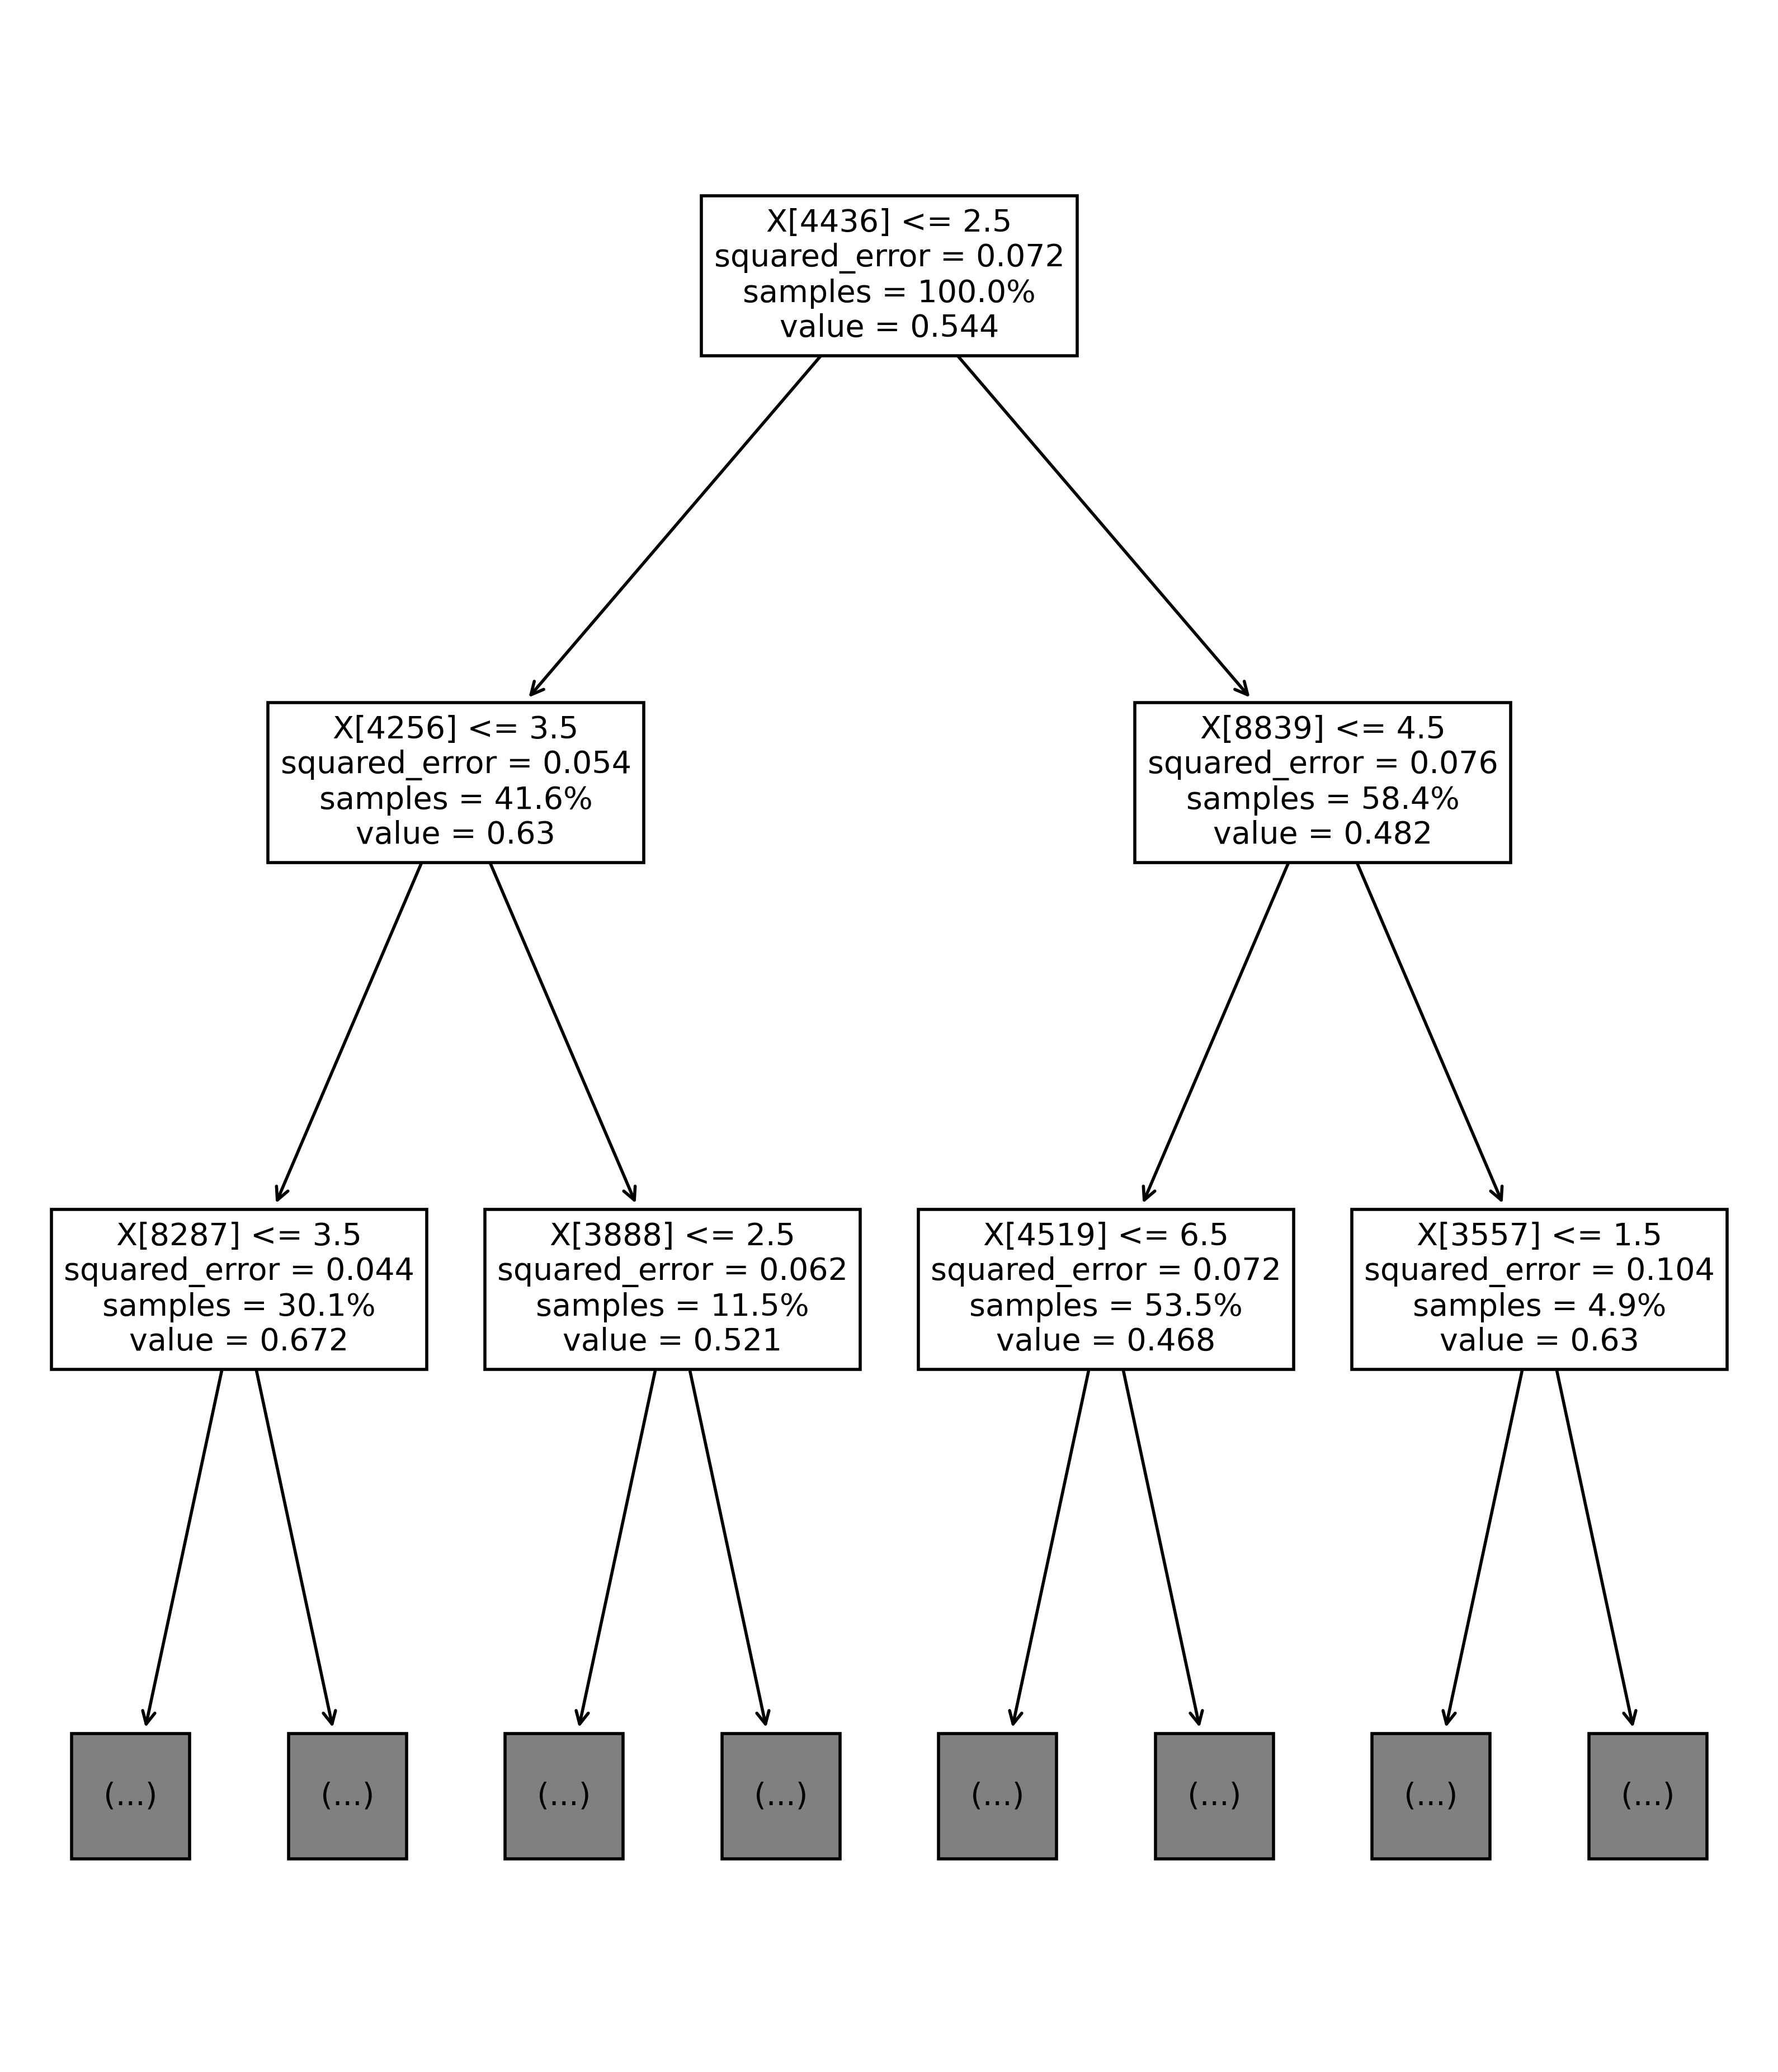

In [ ]:
plt.figure(figsize=(10,12),dpi=400)
plot_tree(model,max_depth=2, impurity=True,fontsize=10,proportion=True)

(-0.5, 2.5, 2.5, -0.5)

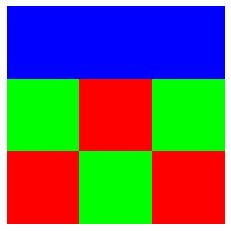

In [ ]:
plt.imshow(vols[3557])
ax=plt.gca()
ax.axis('off')

  0%|          | 0/16 [00:00<?, ?it/s]

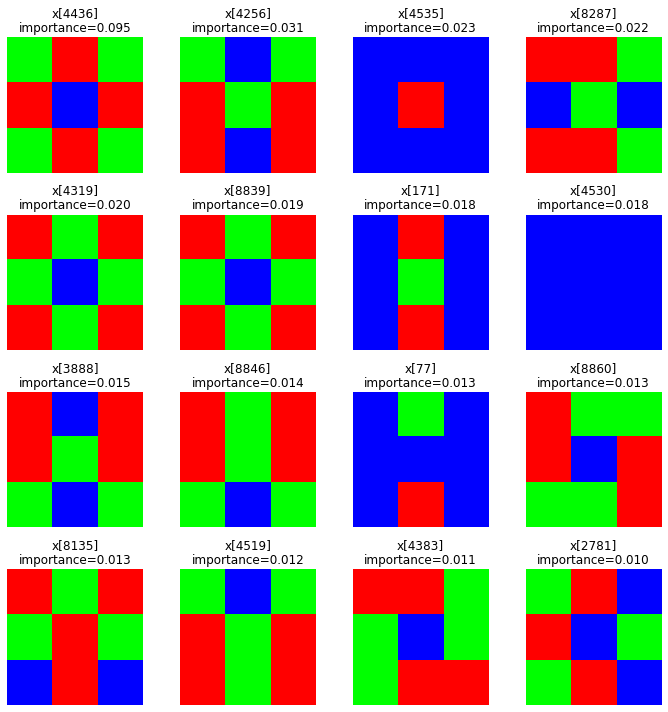

In [ ]:
# show the n most important features

s=4
fig,axes=plt.subplots(s,s,figsize=(s*2.5,s*2.5))
for i in tqdm_notebook(range(16)):
    
    row=int(i/s)
    col=i%s
    ax=axes[row,col]
    ax.imshow(important_filters[i])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axis('off')
    ax.set_title(f'x[{np.argsort(model.feature_importances_)[::-1][i]}]\nimportance={feature_importances[i]:1.3f}')
    plt.tight_layout()

Text(0.5, 1.0, 'features importance')

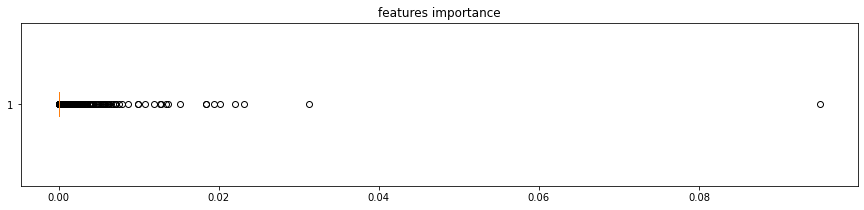

In [ ]:
plt.figure(figsize=(15,3))
plt.boxplot(feature_importances,vert=False)
plt.title('features importance')

In [ ]:
i=5
int(i/3)

1

mo